# classify the Size_Category using SVM
---

Feature | Description | Range
:-: | :-: | :-:
month | month of the year | 'jan' to 'dec'
day | day of the week | 'mon' to 'sun'
FFMC | FFMC index from the FWI system | 18.7 to 96.20
DMC | DMC index from the FWI system | 1.1 to 291.3
DC | DC index from the FWI system | 7.9 to 860.6
ISI | ISI index from the FWI system | 0.0 to 56.10
temp | temperature in Celsius degrees | 2.2 to 33.30
RH | relative humidity in % | 15.0 to 100
wind | wind speed in km/h | 0.40 to 9.40
rain | outside rain in mm/m2 | 0.0 to 6.4
Size_Categorie | the burned area of the forest | ( Small , Large)

## Data Gathering

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv("forestfires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


There seem to be dummy columns for month feature

## Data Exploration

In [3]:
# Getting feature inforamtion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

day feature has dummies as well

Let us remove these dummies, to keep our data simple for now : 

In [4]:
# Dropping dummy columns
df.drop(columns = df.iloc[:, 11:30].columns, inplace=True)
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [5]:
# Checking for na values
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

No na values

In [6]:
# Checking for duplicate samples
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


We have 8 duplicate entries, which we will remove

In [7]:
# Dropping duplicates
df.drop_duplicates(inplace=True, ignore_index=True)

In [8]:
# Stats on numeric features
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [9]:
# Checking unique values for each feature
df.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
size_category      2
dtype: int64

month, day, size_category are categorical features. The rest are numeric. However, it is surprising to see so few unique values for rain. This feature needs to be explored more.

## Data Visualization

In [10]:
# Defining categorical features
categorical_features = ['month', 'day', 'size_category']

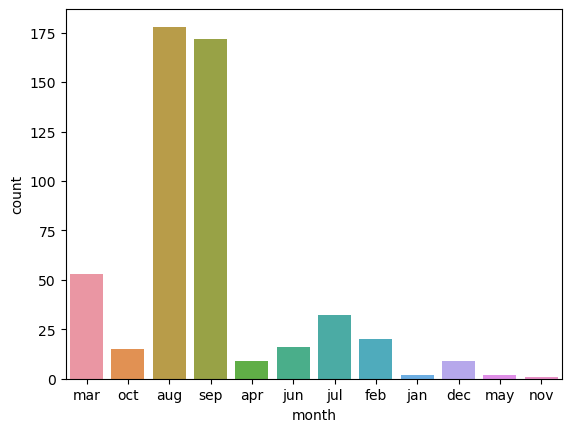

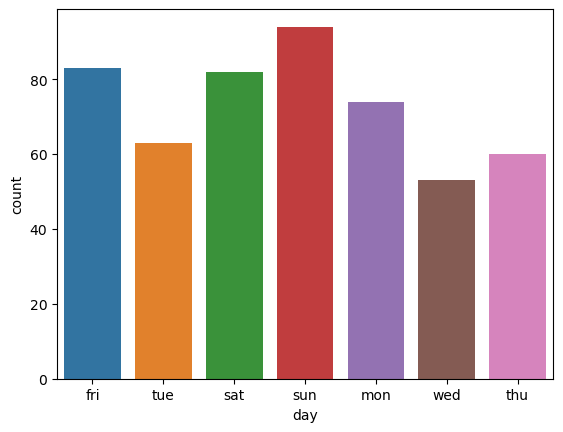

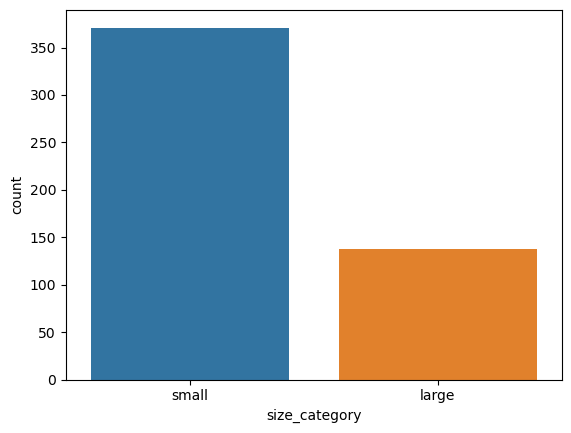

In [11]:
# Plotting countplot for all categorical features
for col in categorical_features:
    sns.countplot(df, x = col)
    plt.show()

Majority of fires are from August and September. Size category feature is very imbalanced with small having 70% which large having 30%. With days, we see that friday, saturday, sunday, monday has higher values. Lets check distribution of size_category in month and day

<Axes: xlabel='month', ylabel='count'>

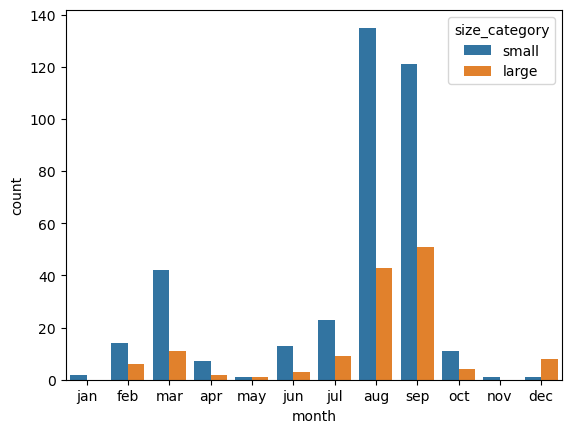

In [12]:
# Countplot for month for each size category
sns.countplot(df, x = 'month', order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], hue = 'size_category')

<Axes: xlabel='day', ylabel='count'>

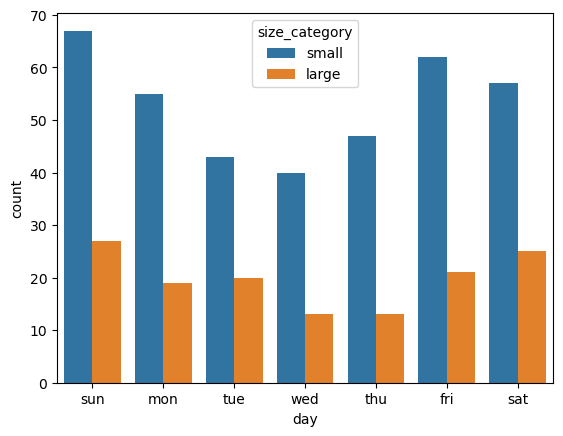

In [13]:
# Countplot for day for each size category
sns.countplot(df, x = 'day', order = ['sun','mon','tue','wed','thu','fri','sat'], hue = 'size_category')

We do not see any pattern to distinguish fire size based on month or day. Both fire sizes are present in each entry, with a larger count for small fires

In [14]:
# Defining continuous features
continuous_features = [col for col in df.columns if col not in categorical_features]

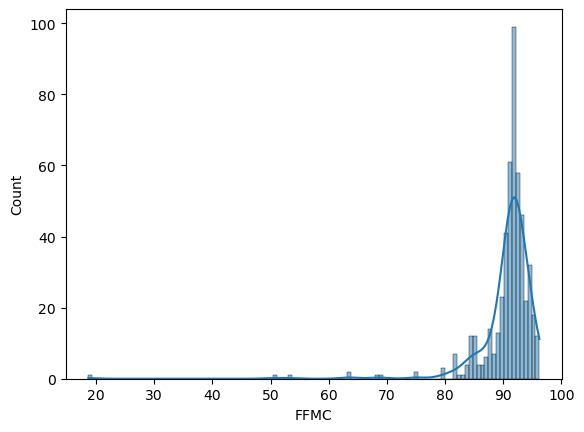

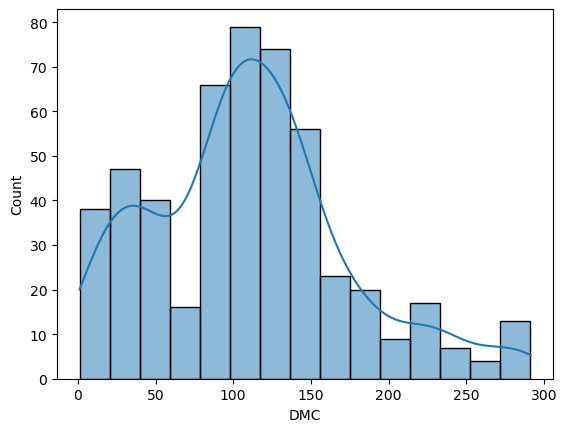

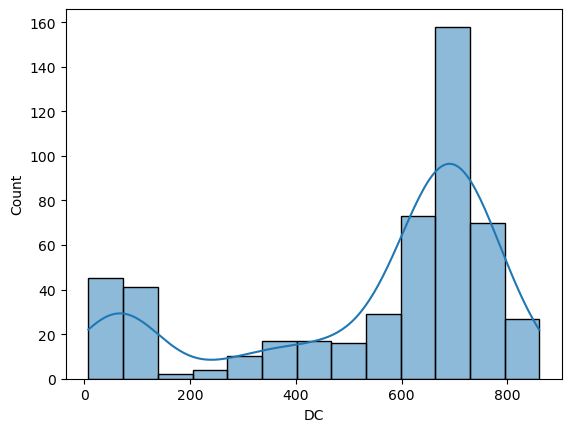

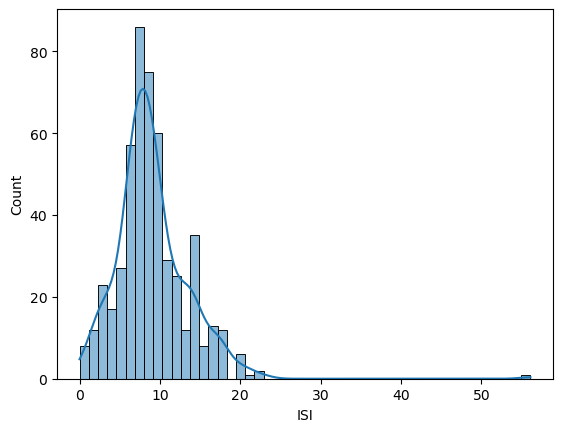

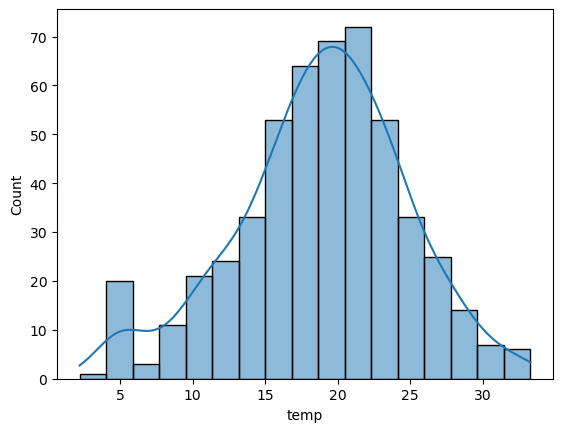

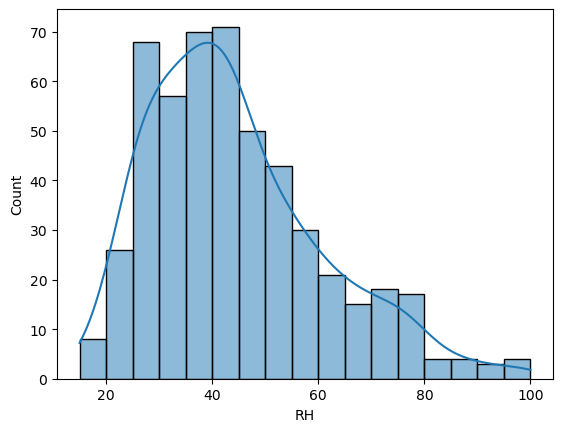

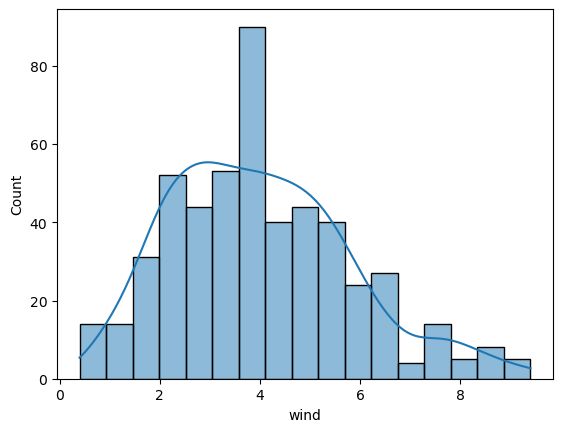

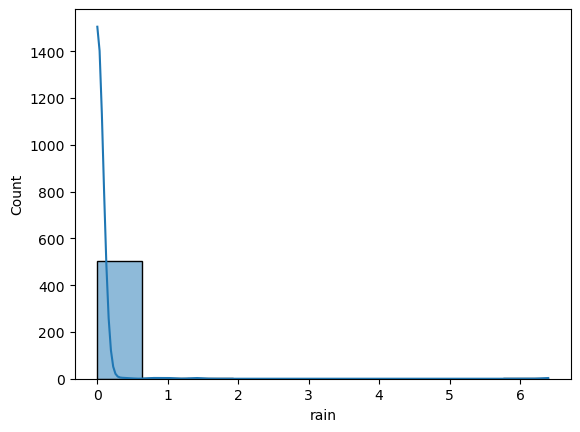

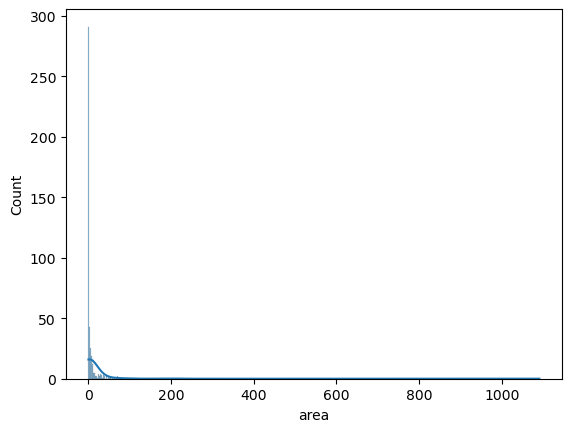

In [15]:
# Plotting histplot for all categorical features
for col in continuous_features:
    sns.histplot(df, x = col, kde = True)
    plt.show()

rain, ffmc, and dc are very skewed

As rain is dominated by a single value, we will check the distribution without the dominating value

In [16]:
# Value counts for rain
df.rain.value_counts()

0.0    502
0.2      2
1.0      1
6.4      1
0.8      1
0.4      1
1.4      1
Name: rain, dtype: int64

<Axes: xlabel='rain', ylabel='count'>

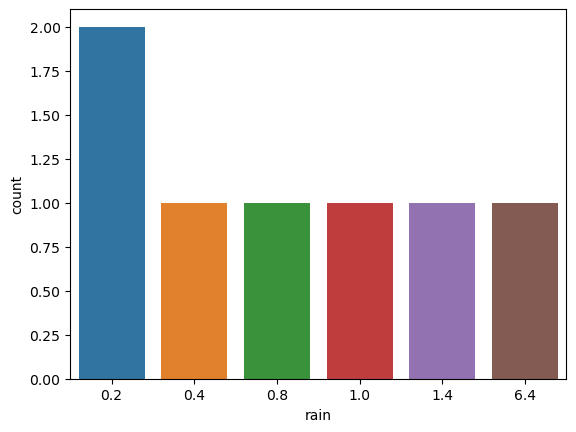

In [17]:
# Histplot for area without 0 values
sns.countplot(x = df[df.rain != 0].rain)

Ignoring 0 value for rain, we only have 7 other entries.

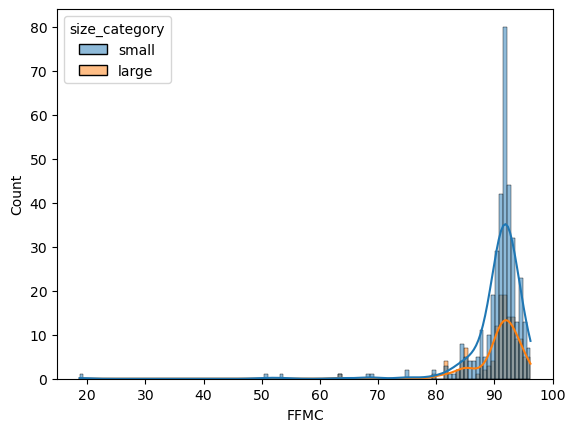

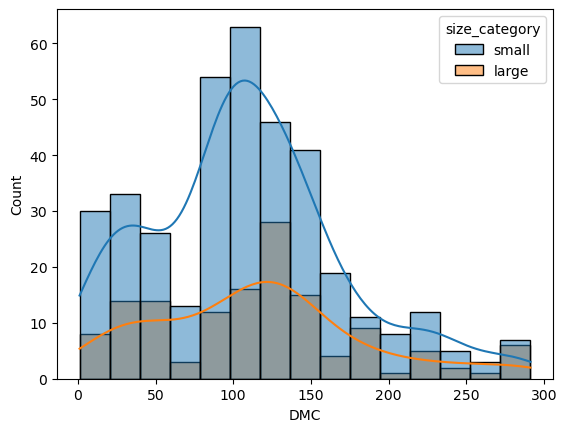

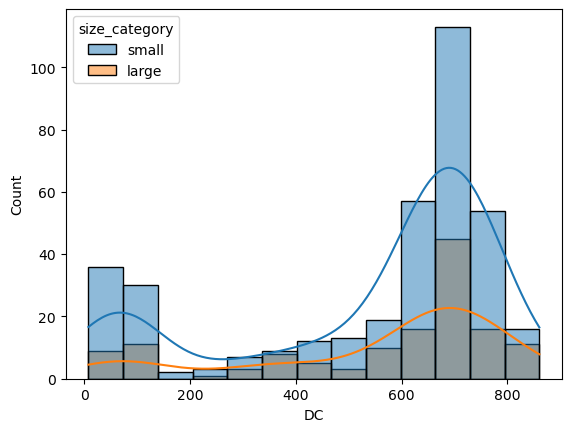

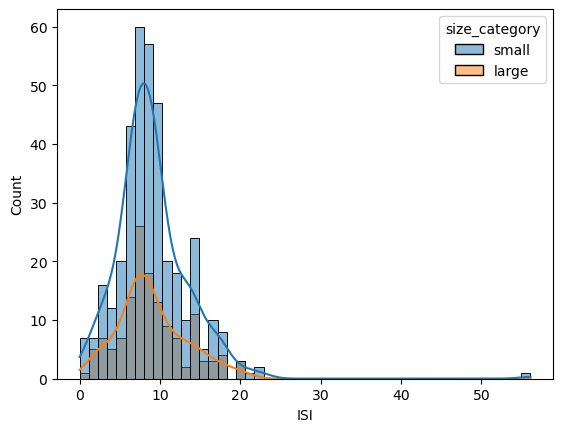

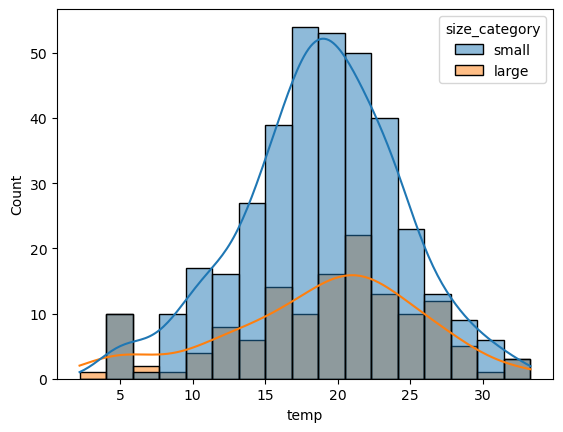

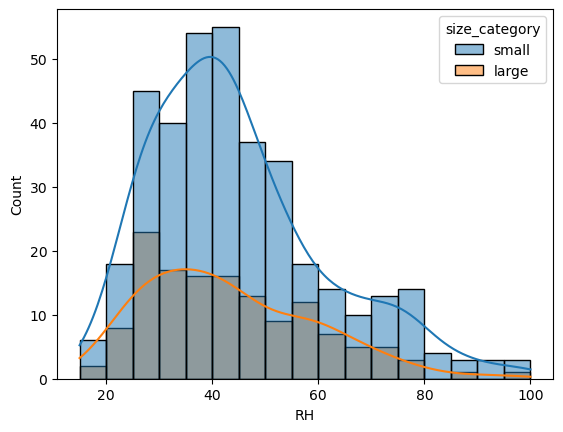

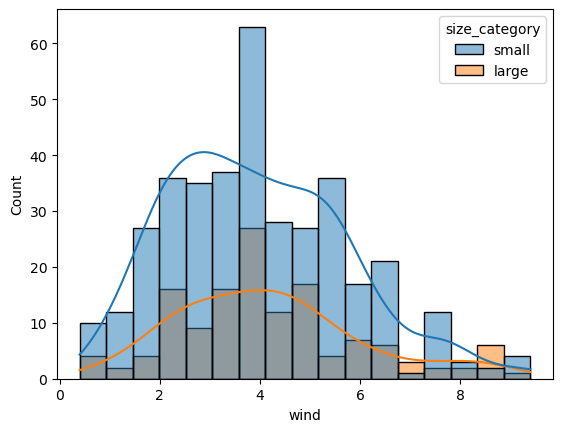

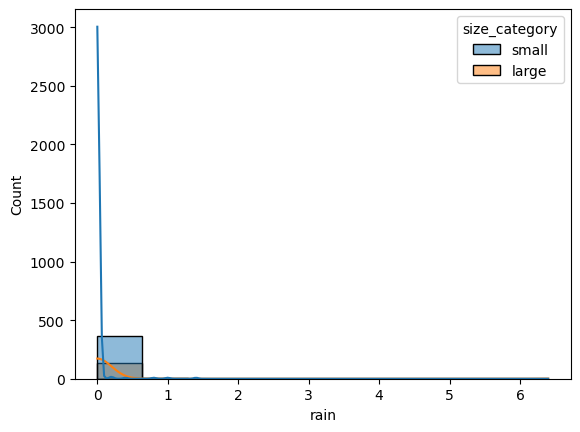

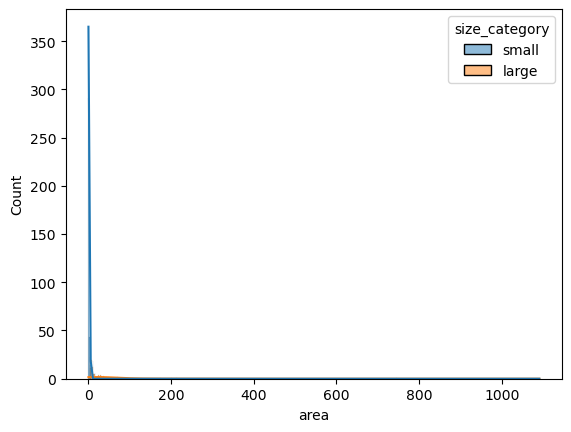

In [18]:
# Plotting distribution of fire size for all categorical features
for col in continuous_features:
    sns.histplot(df, x = col, hue = 'size_category', kde = True)
    plt.show()

<Axes: xlabel='rain', ylabel='count'>

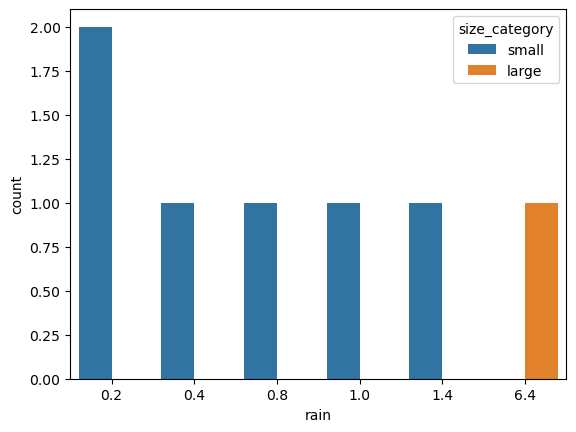

In [19]:
# Histplot for rain without 0 values
sns.countplot(x = df[df.rain != 0].rain, hue = df.size_category)

Only one of the 7 values greater than 0 of rain are of large fire size

There is no clear pattern to distinguish size_category based on any of the continuous features

None of the features are correlated with the target variable

Let us try to normalize the features 

In [20]:
# Importing boxcox transformer
from scipy.stats import boxcox

For FFMC : 

<Axes: ylabel='Count'>

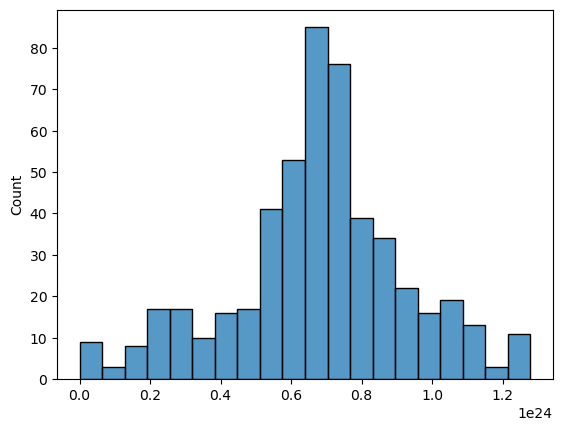

In [21]:
# Applying boxcox to FFMC
data, lmbda =  boxcox((df.FFMC).tolist())
sns.histplot(x = data)

Box Cox transformation works well on FFMC. We will transform the feature : 

In [22]:
# Transforming FFMC using boxcox 
data, lmbda =  boxcox(df.FFMC)
df['FFMC'] = data

For DMC : 

<Axes: ylabel='Count'>

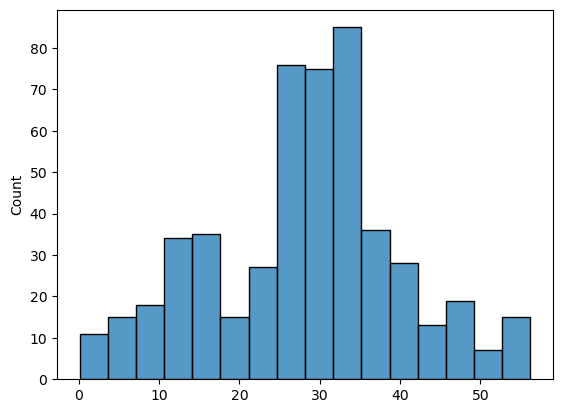

In [23]:
# Applying boxcox to DMC
data, lmbda =  boxcox((df.DMC).tolist())
sns.histplot(x = data)

In [24]:
# Transforming DMC using boxcox 
data, lmbda =  boxcox(df.DMC)
df['DMC'] = data

For DC : 

<Axes: ylabel='Count'>

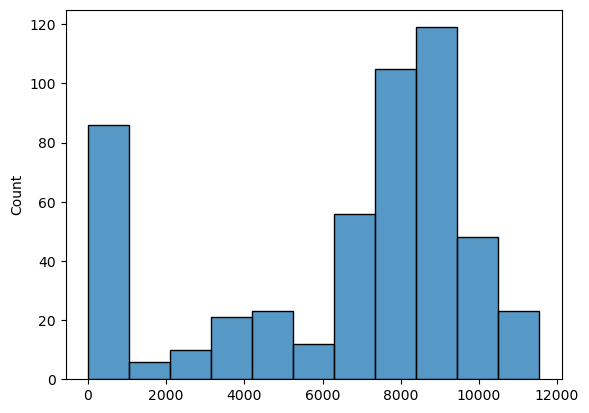

In [25]:
# Applying boxcox to DC
data, lmbda =  boxcox((df.DC).tolist())
sns.histplot(x = data)

Box Cox transformation does not work for DC feature, neither do log or sqrt transformations.

For ISI : 

<Axes: ylabel='Count'>

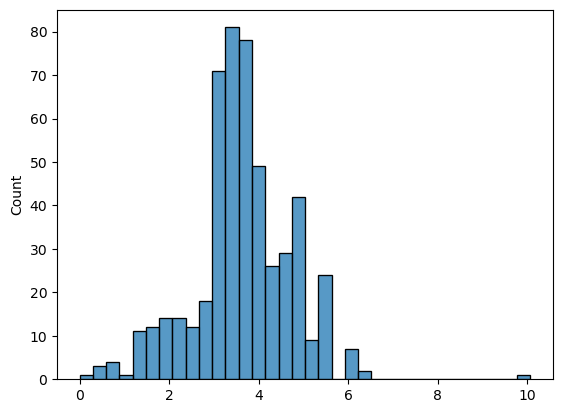

In [26]:
# Applying boxcox to ISI
data, lmbda =  boxcox((df.ISI + 1).tolist())
sns.histplot(x = data)

In [27]:
# Transforming ISI using boxcox
df['ISI'] = data

For temp : temp is already quite normal

For RH : 

<Axes: ylabel='Count'>

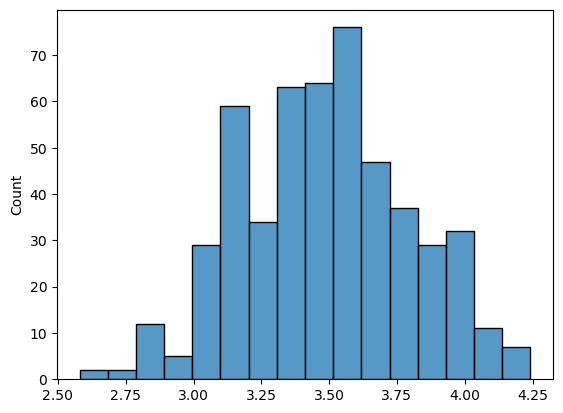

In [28]:
# Applying boxcox to RH
data, lmbda =  boxcox((df.RH).tolist())
sns.histplot(x = data)

In [29]:
# Transforming RH using boxcox
df['RH'] = data

For wind : Is quite normal already

For rain : 

<Axes: ylabel='Count'>

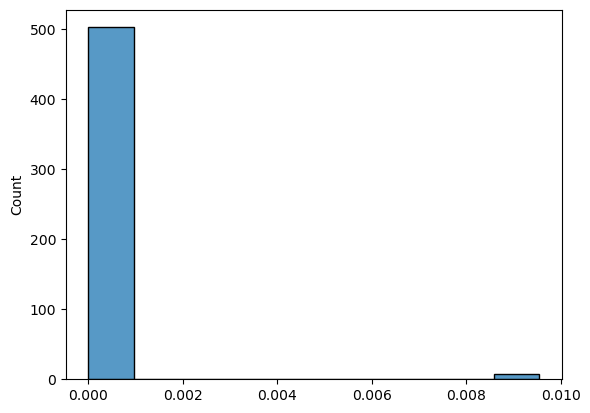

In [30]:
# Applying boxcox to rain
data, lmbda =  boxcox((df.rain + 1).tolist())
sns.histplot(x = data)

boxcox doesn't help for this feature

C:\Users\harsh\AppData\Local\Temp\ipykernel_11236\3972453582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

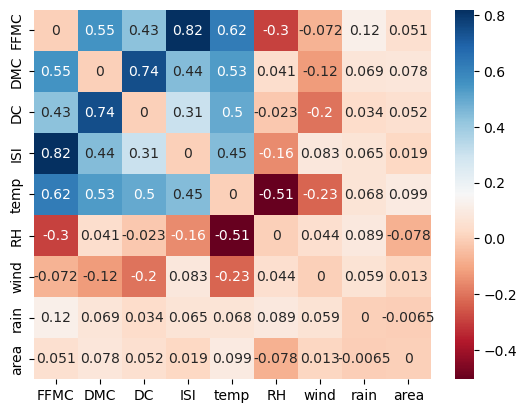

In [31]:
# Plotting correlation between features
corr_matrix = df.corr()
np.fill_diagonal(corr_matrix.values, 0)
sns.heatmap(corr_matrix, annot = True, cmap= 'RdBu')

temp are RH are negatively correlated. DC and DMC, ISI and FFMC, temp and DMC, temp and DC are positively correlated. temp seems to be positively or negatively correlated with a lot of features

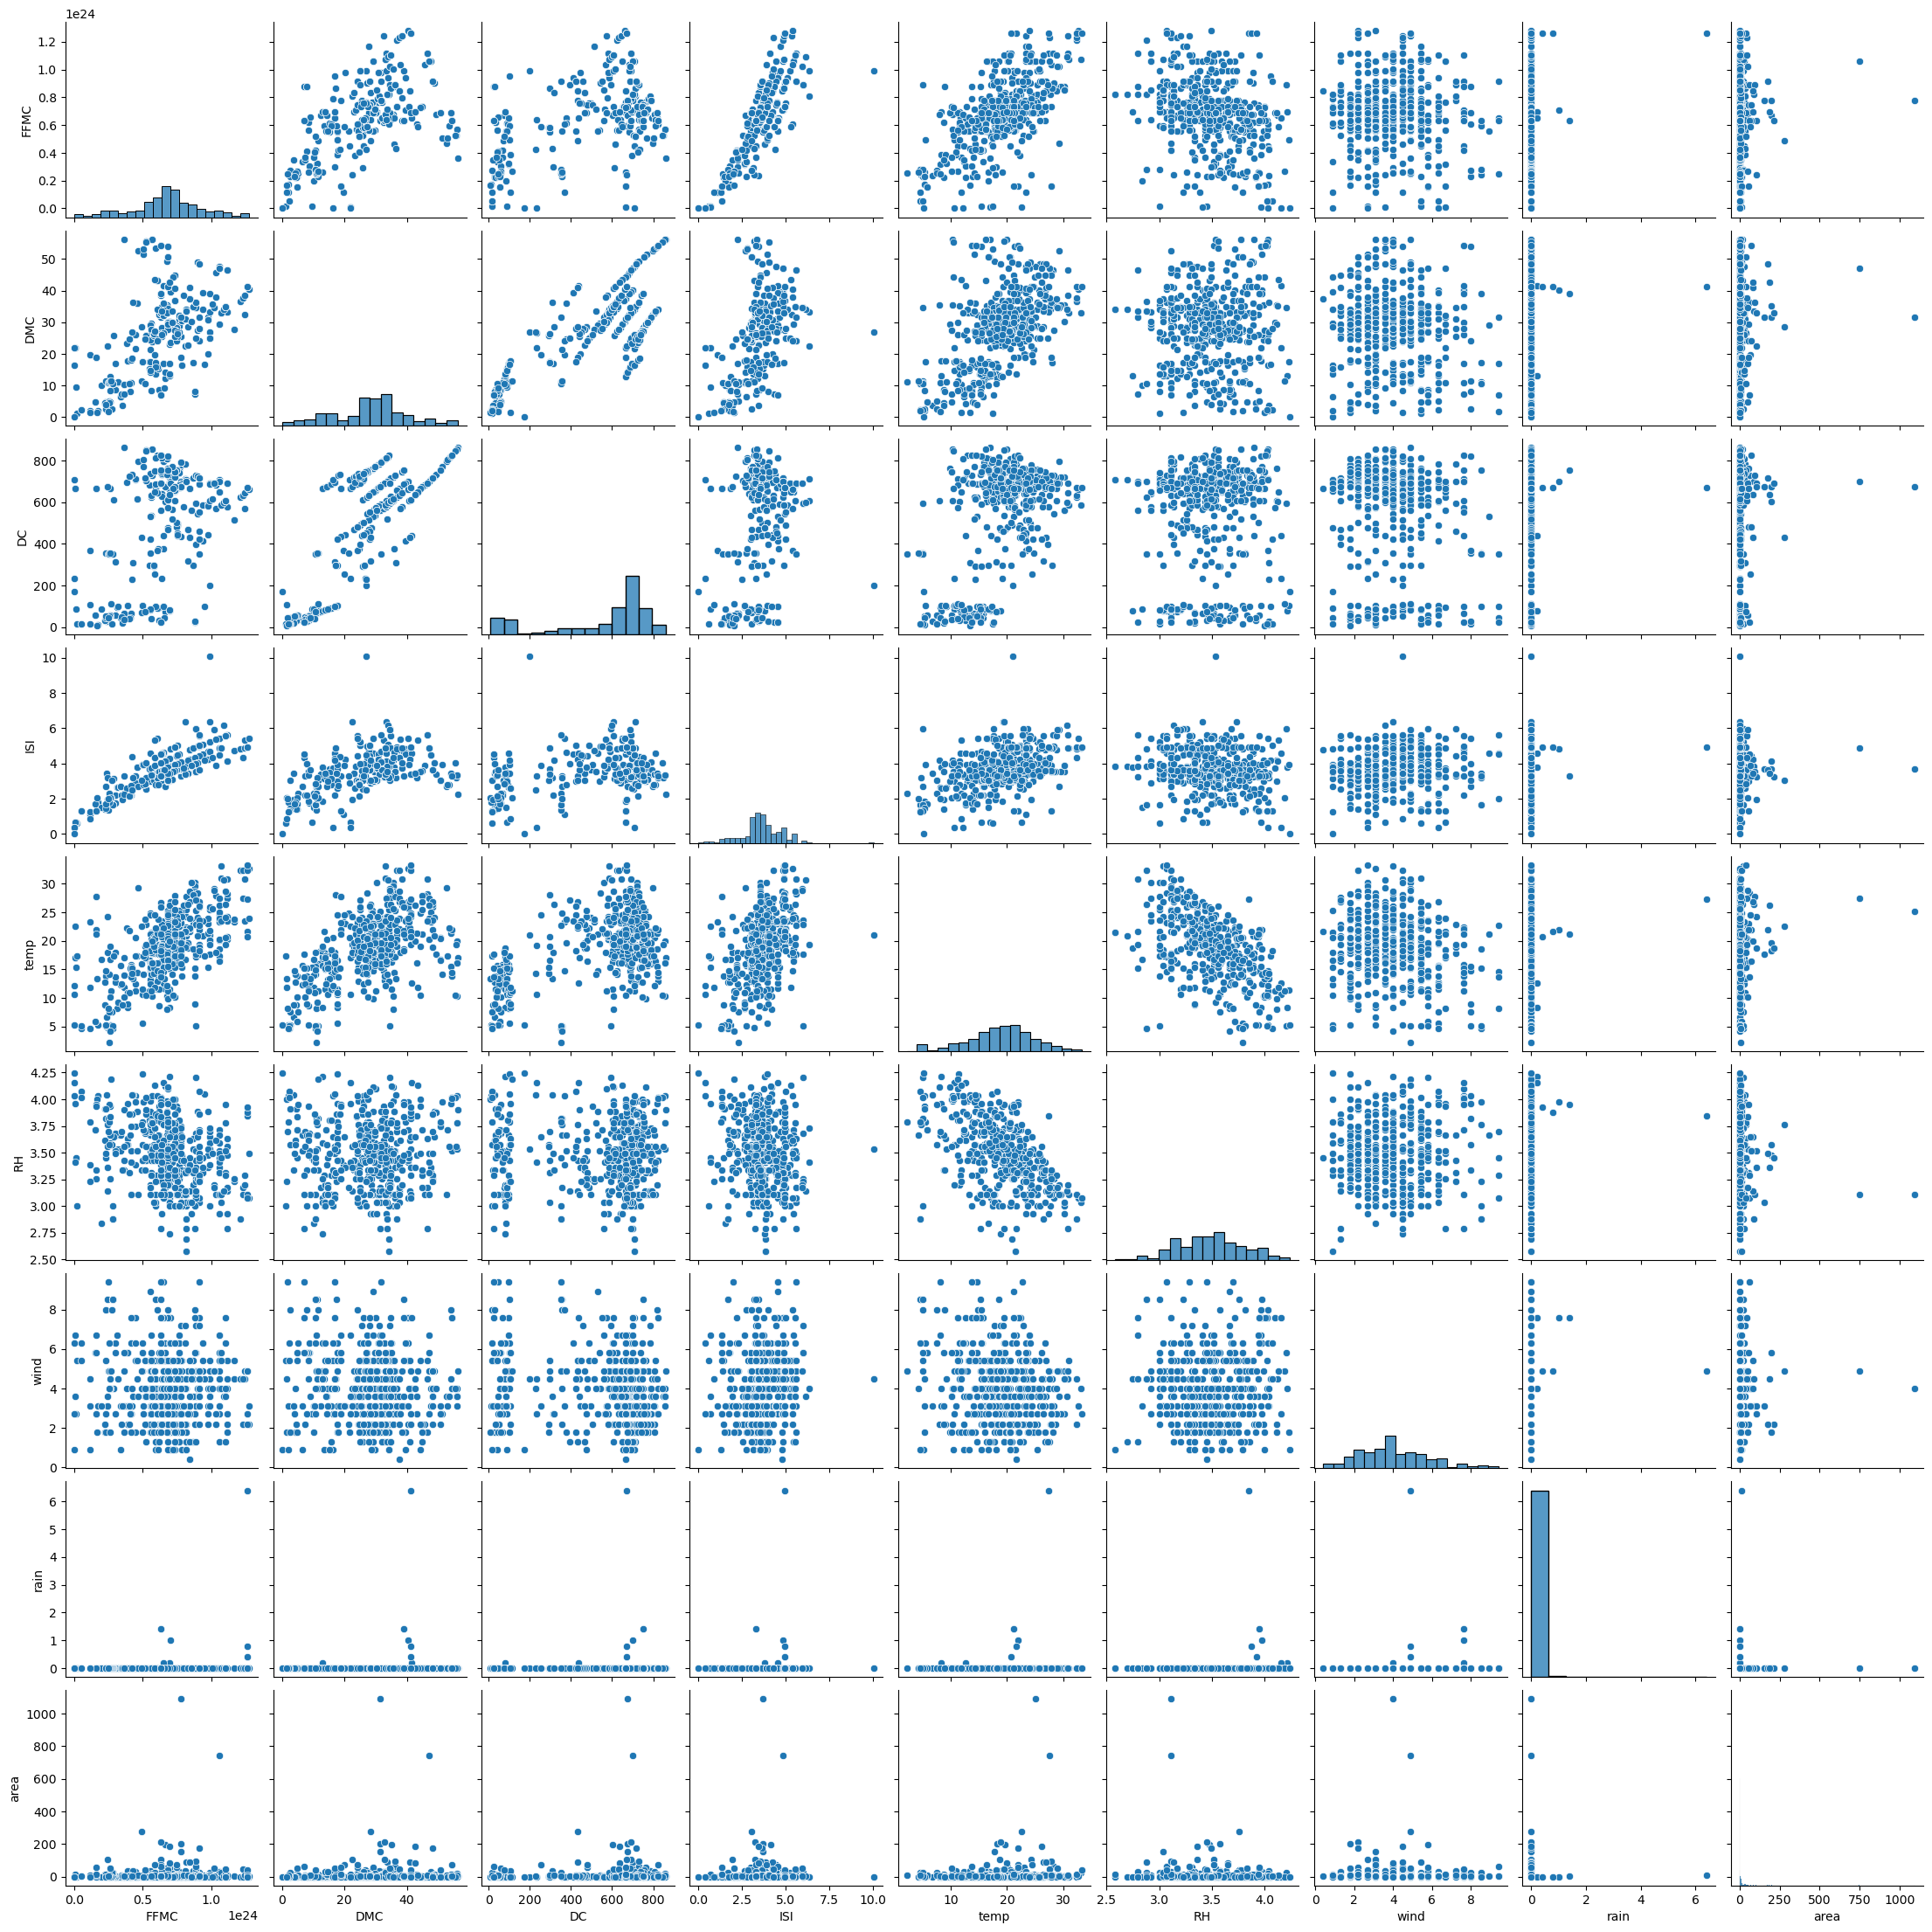

In [32]:
# Getting pairplot
sns.pairplot(df)

## Feature Engineering

Let us one hot encode categorical features :

In [33]:
# Dropping area feature
df.drop(columns = 'area', inplace = True)

In [34]:
# Converting target feature into binary
df.size_category.replace({'small':0, 'large':1}, inplace=True)

In [35]:
# Creating dummies for categorical features
df = pd.get_dummies(df, columns = ['day', 'month'])

In [36]:
# Defining numeric features
continuous_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

In [37]:
# Standardizing continuous features
from sklearn.preprocessing import StandardScaler
df[continuous_cols] = StandardScaler().fit_transform(df[continuous_cols])

In [38]:
# Separating dependent and independent variables
X = df.drop(columns = 'size_category')
y = df.size_category

In [39]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## Feature Selection

In [40]:
from sklearn.ensemble import RandomForestClassifier

# create a random forest classifier
rfc = RandomForestClassifier()

# fit the model and get the feature importances
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
# Getting importances for each feature
importances = rfc.feature_importances_.tolist()

In [42]:
# Getting feature names
feature_names = rfc.feature_names_in_.tolist()

In [43]:
# Dataframe of Feature names with corresponding importances
pd.DataFrame(importances, feature_names).sort_values(0, ascending = False)

,0
temp,0.185723
RH,0.133841
wind,0.119215
DMC,0.104108
DC,0.100472
FFMC,0.099948
ISI,0.096772
day_sun,0.017260
day_tue,0.016320
month_aug,0.016224


day, month, and rain features have very low importance for predicting the target variable. We might try to remove these features, if our model yields low accuracy

## Hyperparameter Tuning

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay

Let's create a basic model first

In [45]:
# Creating a Support Vector classifier with balanced class weights 
svc = SVC(class_weight = 'balanced', random_state = 42)

# Fitting to and getting accuracy for training set
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

0.6509186351706037

In [46]:
# Getting accuracy for testing set
svc.score(X_test, y_test)

0.4765625

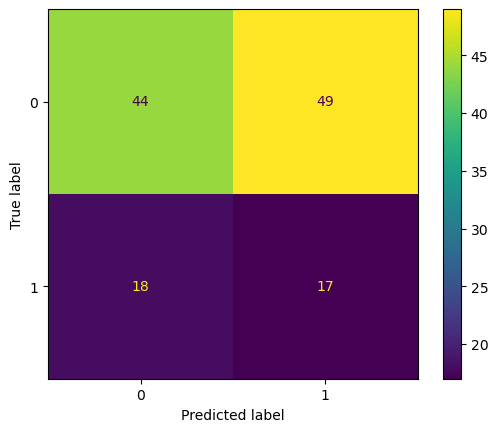

In [47]:
# Plotting a confusion matrix for the test set
ConfusionMatrixDisplay(confusion_matrix(y_test, svc.predict(X_test))).plot()

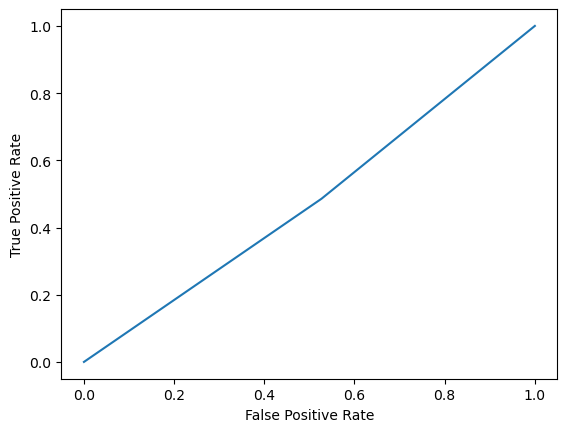

In [48]:
# Plotting a ROC curve for the test set
fpr, tpr, thresholds = roc_curve(y_test, svc.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

We got a very bad classification in Neural Networks assignment as well. Let us check principal components for the data for better understanding

In [49]:
# Importing PCA
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components=2)
PC = pca.fit_transform(X_train, y_train)

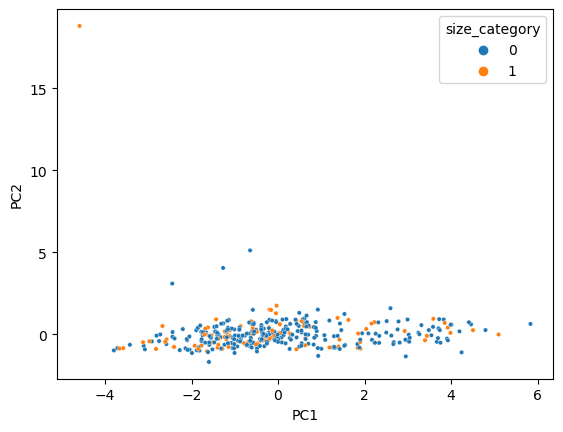

In [51]:
# plot the first two principal components
sns.scatterplot(x = PC[:, 0], y = PC[:, 1], s = 10, hue = y_train)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

We can see that the data is highly clustered which makes classification very difficult. We can preprocess the features to normalize them as much as possible and eliminate less important features. For now, let us eliminate less important features i.e. dummies of day and month and rain feature

In [52]:
# Removing less important features
X = X[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

In [54]:
pca = PCA(n_components=2)
PC = pca.fit_transform(X_train, y_train)

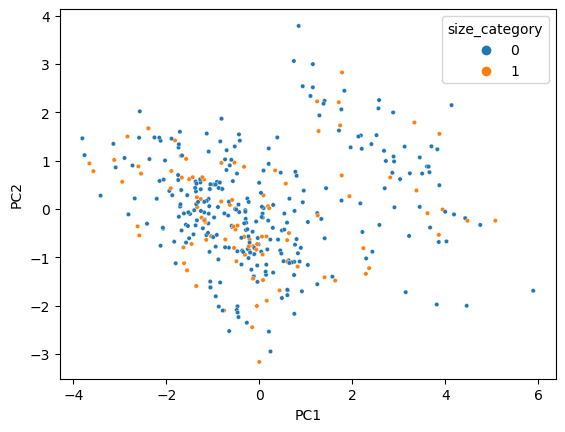

In [55]:
# plot the first two principal components
sns.scatterplot(x = PC[:, 0], y = PC[:, 1], s = 10, hue = y_train)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [56]:
svc.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [57]:
svc.score(X_train, y_train)

0.6482939632545932

In [58]:
svc.score(X_test, y_test)

0.5

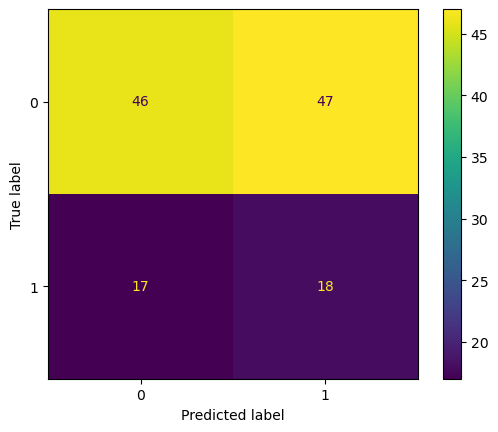

In [59]:
# Plotting a confusion matrix for the test set
ConfusionMatrixDisplay(confusion_matrix(y_test, svc.predict(X_test))).plot()

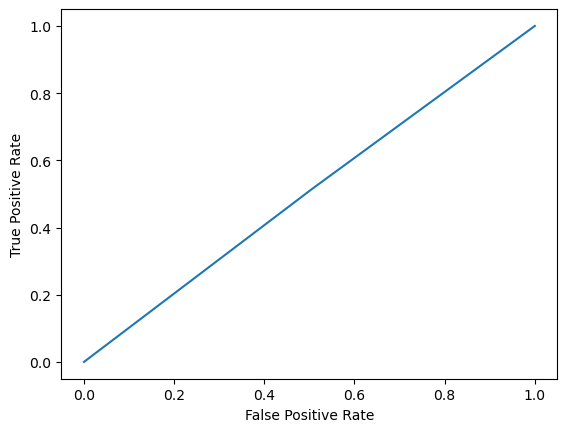

In [60]:
# Plotting a ROC curve for the test set
fpr, tpr, thresholds = roc_curve(y_test, svc.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Support Vector Classifier uses linear, polynomial, rbf, or sigmoid kernel

### For linear kernel

In [61]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [62]:
# Defining hyper parameter values

C = []
for i in range(-10,11):
    C.append(2**i)
    
param_grid = {
    'C' : C
}

In [63]:
# Creating a SVC with linear kernel
svc = SVC(kernel = 'linear', class_weight = 'balanced', random_state = 42)

In [64]:
# Creating a grid search to evaluate hyperparameter combinations by f1 score
grid = GridSearchCV(estimator = svc, param_grid = param_grid, n_jobs = -1, cv = StratifiedKFold(), scoring = 'f1', verbose = 3)

In [65]:
# Fitting to grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(class_weight='balanced', kernel='linear',
                           random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.0009765625, 0.001953125, 0.00390625, 0.0078125,
                               0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1,
                               2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]},
             scoring='f1', verbose=3)

In [66]:
# Best grid score 
grid.best_score_

0.42645402165206836

In [67]:
# Parameters that gave the best score
grid.best_params_

{'C': 0.001953125}

In [68]:
# Creating a SVC with the best hyperparameters
svc = SVC(C = 0.002, kernel = 'linear', class_weight = 'balanced', random_state = 42)
svc.fit(X_train,y_train)
svc.score(X_train,y_train)

0.27034120734908135

In [69]:
svc.score(X_test,y_test)

0.2734375

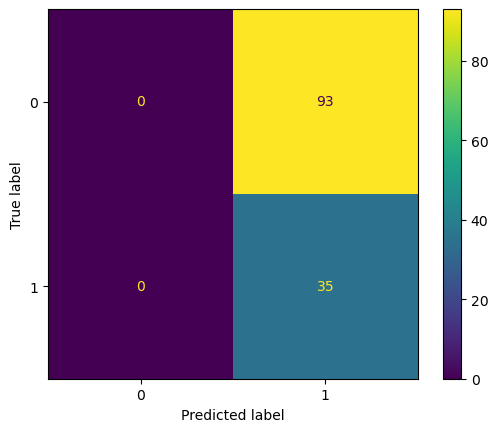

In [70]:
# Plotting a confusion matrix for the test set
ConfusionMatrixDisplay(confusion_matrix(y_test, svc.predict(X_test))).plot()

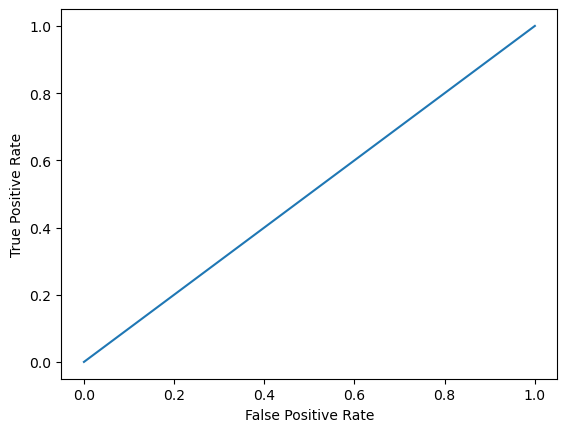

In [71]:
# Plotting a ROC curve for the test set
fpr, tpr, thresholds = roc_curve(y_test, svc.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Linear kernel gets the best f1 score for C value 0.002, but it classifies all samples to label 1

### For polynomial kernel

In [72]:
# Defining hyperparameter range

C = []
for i in range(-10,11):
    C.append(2**i)
    
G = []
for i in range(-10,1):
    G.append(2**i)

param_grid = {
    'C' : C,
    'degree' : [i for i in range(1,7)],
    'gamma' : G
}

In [73]:
svc = SVC(kernel = 'poly', class_weight = 'balanced', random_state = 42)

In [74]:
grid = GridSearchCV(estimator = svc, param_grid = param_grid, n_jobs = -1, cv = StratifiedKFold(), scoring = 'f1', verbose = 3)

In [75]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1386 candidates, totalling 6930 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(class_weight='balanced', kernel='poly',
                           random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.0009765625, 0.001953125, 0.00390625, 0.0078125,
                               0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1,
                               2, 4, 8, 16, 32, 64, 128, 256, 512, 1024],
                         'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [0.0009765625, 0.001953125, 0.00390625,
                                   0.0078125, 0.015625, 0.03125, 0.0625, 0.125,
                                   0.25, 0.5, 1]},
             scoring='f1', verbose=3)

In [76]:
grid.best_score_

0.42645402165206836

In [77]:
grid.best_params_

{'C': 0.001953125, 'degree': 1, 'gamma': 1}

Even with polynomial kernel we got best score for linear kernel, like in the previous section. However, let us try a few different combinations of C, degree, and gamma

Training Accuracy : 0.7349081364829396
Testing Accuracy : 0.515625


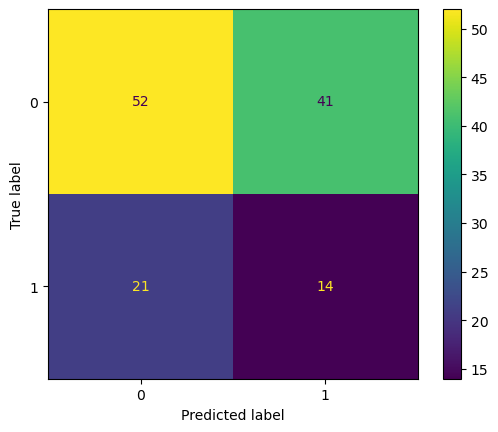

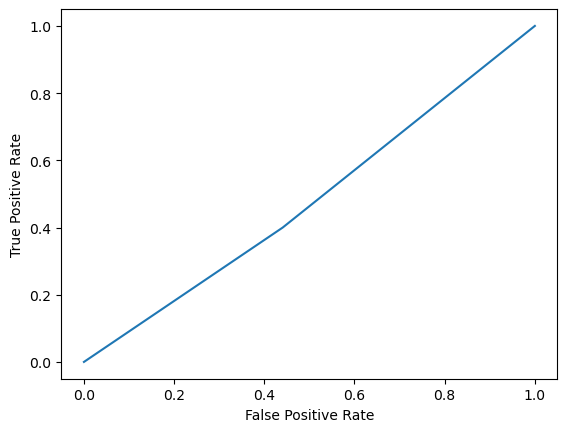

In [78]:
svc = SVC(kernel = 'poly', C = 1, degree = 3, gamma = 2, cache_size = 1000, class_weight = 'balanced', random_state = 42)
svc.fit(X_train,y_train)
print(f"Training Accuracy : {svc.score(X_train,y_train)}")
print(f"Testing Accuracy : {svc.score(X_test,y_test)}")
ConfusionMatrixDisplay(confusion_matrix(y_test, svc.predict(X_test))).plot()
fpr, tpr, thresholds = roc_curve(y_test, svc.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

By increasing gamma, and degrees, we can get a good accuracy score for training data, but the testing score remains low. So, we can overfit to the training data by increasing gamma and degrees

### For RBF kernel

In [79]:
C = []
for i in range(-10,11):
    C.append(2**i)
    
G = []
for i in range(-10,1):
    G.append(2**i)

param_grid = {
    'C' : C,
    'gamma' : G
}

In [80]:
svc = SVC(class_weight = 'balanced', cache_size = 1000, random_state = 42)

In [81]:
grid = GridSearchCV(estimator = svc, param_grid = param_grid, n_jobs = -1, cv = StratifiedKFold(), scoring = 'f1', verbose = 10)

In [82]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 231 candidates, totalling 1155 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(cache_size=1000, class_weight='balanced',
                           random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.0009765625, 0.001953125, 0.00390625, 0.0078125,
                               0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1,
                               2, 4, 8, 16, 32, 64, 128, 256, 512, 1024],
                         'gamma': [0.0009765625, 0.001953125, 0.00390625,
                                   0.0078125, 0.015625, 0.03125, 0.0625, 0.125,
                                   0.25, 0.5, 1]},
             scoring='f1', verbose=10)

In [83]:
grid.best_score_

0.4276159648377703

In [84]:
grid.best_params_

{'C': 0.125, 'gamma': 1}

In [85]:
svc = SVC(C = 0.125, gamma = 1, class_weight = 'balanced', random_state = 42)
svc.fit(X_train,y_train)
svc.score(X_train,y_train)

0.5328083989501312

In [86]:
svc.score(X_test,y_test)

0.2578125

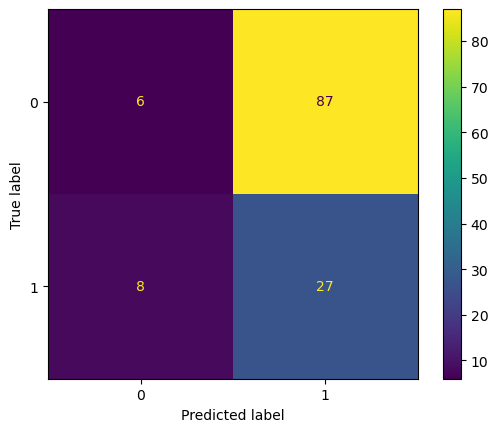

In [87]:
# Plotting a confusion matrix for the test set
ConfusionMatrixDisplay(confusion_matrix(y_test, svc.predict(X_test))).plot()

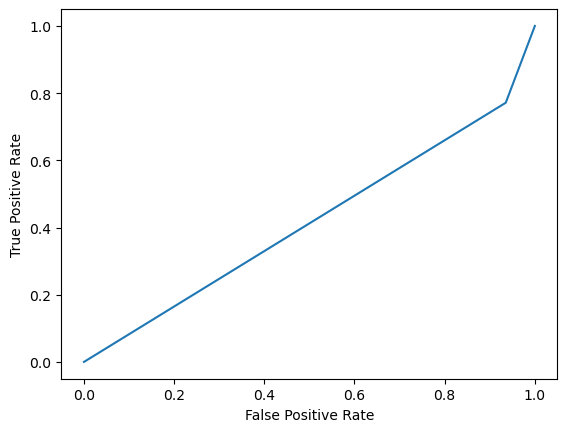

In [88]:
# Plotting a ROC curve for the test set
fpr, tpr, thresholds = roc_curve(y_test, svc.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Most samples in testing set are classified as 1. AUC is less than 0.5

### For Sigmoid kernel

In [89]:
C = []
for i in range(-10,11):
    C.append(2**i)
    
G = []
for i in range(-10,1):
    G.append(2**i)

param_grid = {
    'C' : C,
    'gamma' : G
}

In [90]:
svc = SVC(kernel = 'sigmoid', class_weight = 'balanced', random_state = 42)

In [91]:
grid = GridSearchCV(estimator = svc, param_grid = param_grid, n_jobs = -1, cv = StratifiedKFold(), scoring = 'f1', verbose = 3)

In [92]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 231 candidates, totalling 1155 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(class_weight='balanced', kernel='sigmoid',
                           random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.0009765625, 0.001953125, 0.00390625, 0.0078125,
                               0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1,
                               2, 4, 8, 16, 32, 64, 128, 256, 512, 1024],
                         'gamma': [0.0009765625, 0.001953125, 0.00390625,
                                   0.0078125, 0.015625, 0.03125, 0.0625, 0.125,
                                   0.25, 0.5, 1]},
             scoring='f1', verbose=3)

In [93]:
grid.best_score_

0.42795778105056465

In [94]:
grid.best_params_

{'C': 0.015625, 'gamma': 0.5}

Even with polynomial kernel we got best score for linear kernel, like in the previous section. However, let us try a few different combinations of C, degree, and gamma

Training Accuracy : 0.27034120734908135
Testing Accuracy : 0.2734375


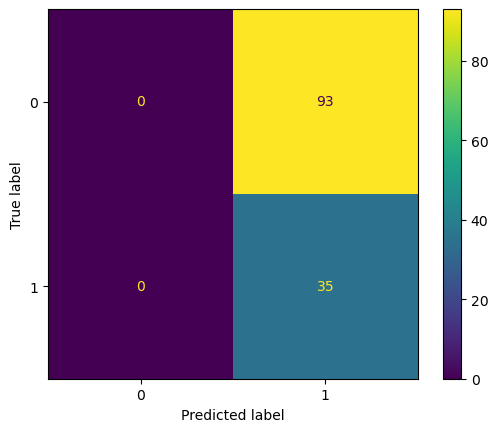

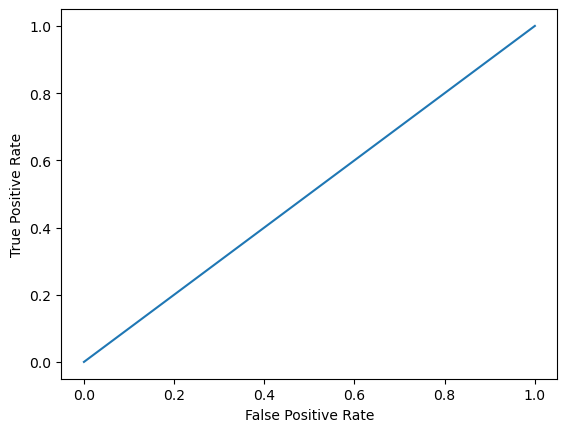

In [95]:
svc = SVC(kernel = 'sigmoid', C = 0.015, gamma = 0.5, cache_size = 1000, class_weight = 'balanced', random_state = 42)
svc.fit(X_train,y_train)
print(f"Training Accuracy : {svc.score(X_train,y_train)}")
print(f"Testing Accuracy : {svc.score(X_test,y_test)}")
ConfusionMatrixDisplay(confusion_matrix(y_test, svc.predict(X_test))).plot()
fpr, tpr, thresholds = roc_curve(y_test, svc.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

All samples in test set are classified as 1

## Conclusion

- The dataset is notoriously difficult to model with good accuracy
- The best score we got without overfitting is same as random chance i.e. 50% AUC
- As the dataset is so small, it is easy to overfit and get a good training score, but the test score remains very weak
- It seems there are no discernable patterns in the dataset for ML algorithms to find